# Assign tolerances using Montecarlo simulation

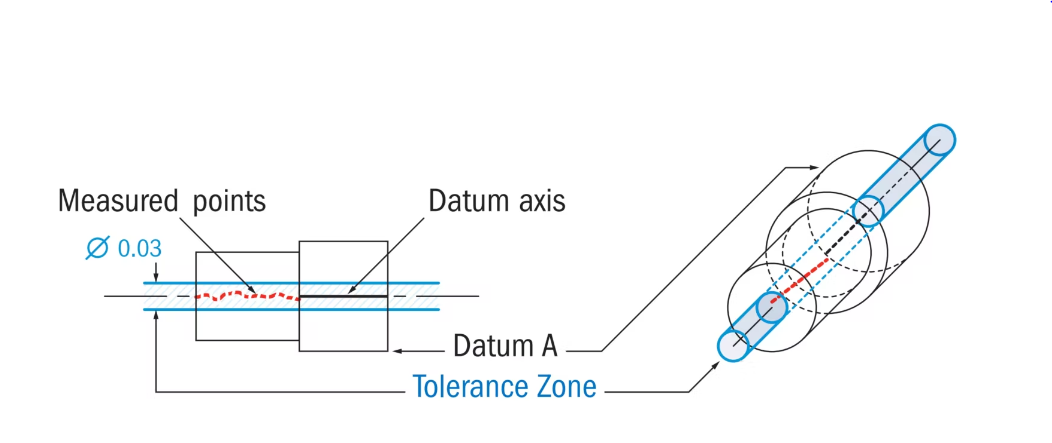


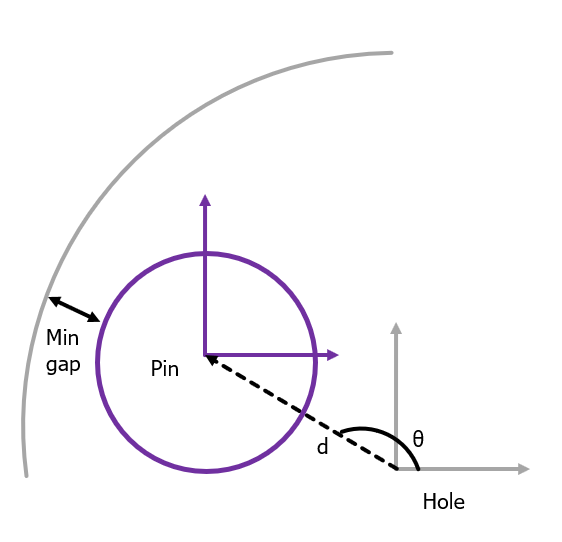


# Off components: 6
% Off components: 0.6
elapsed time: 
 3.915 s


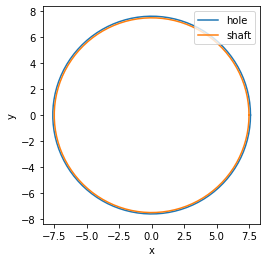

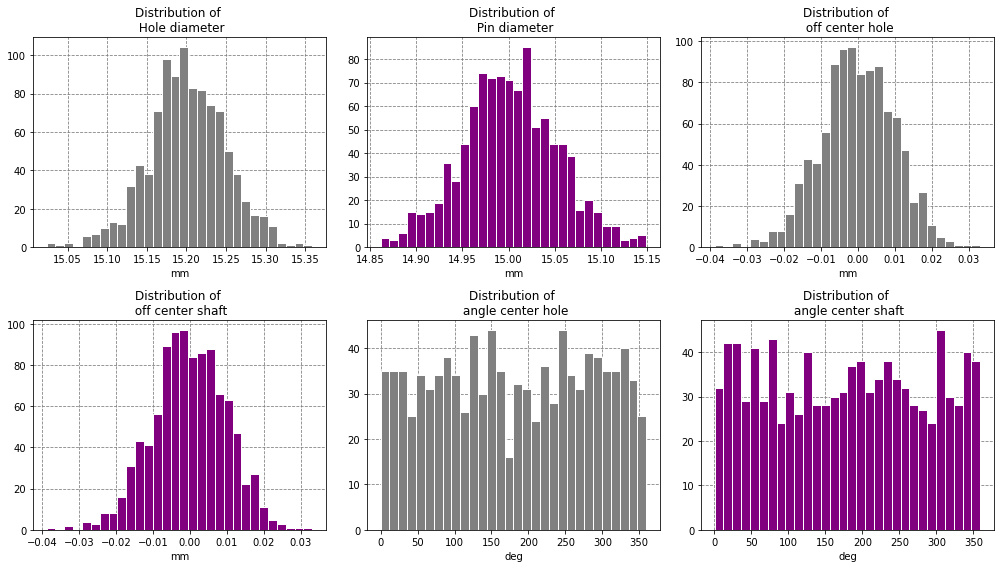

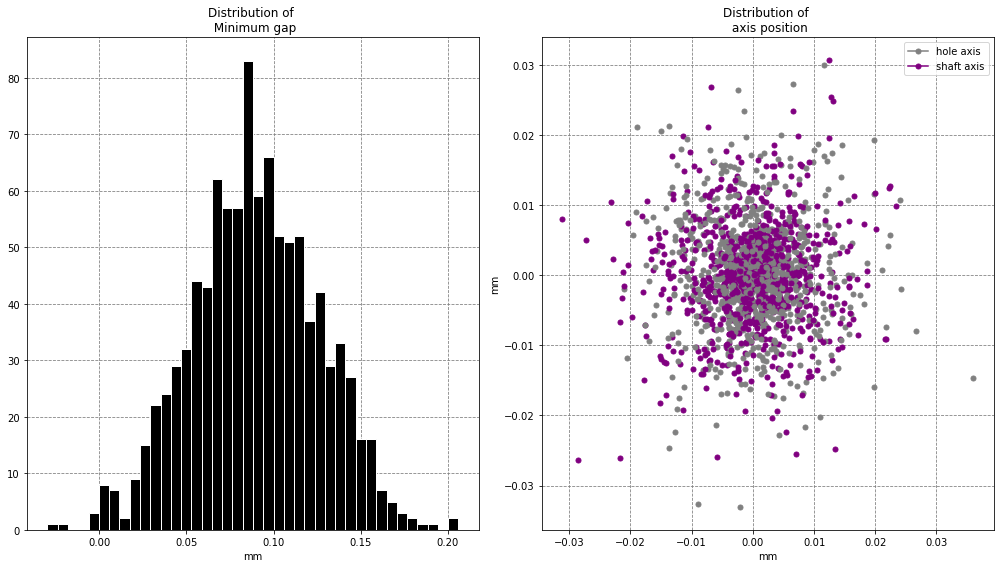

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time as t
import colorcet as cc
import matplotlib.colors as colors
from fast_histogram import histogram2d
%matplotlib inline 

fact_rad_deg = 180/np.pi
fact_deg_rad = np.pi/180


tic = t.time()

n = 1000           #n point simulation
n_crf_dscr = 100   #circumfernce discretization point
n_lot = 5          #lot number

hole_diam = 15.2     #nominal hole diameter
shaft_diam = 15.0    #nominal shaft diameter

tol_shaft = 0.05                 #tolerance on shaft diameter
tol_hole = 0.05                  #tolerance on hole diameter
tol_geom_axis_diameter = 0.02    #tolerance on concentricity axis

X_crf_hole = np.zeros((n,n_crf_dscr))    #X point distribution crf hole
Y_crf_hole = np.zeros((n,n_crf_dscr))    #Y point distribution crf hole

X_crf_shaft = np.zeros((n,n_crf_dscr))   #X point distribution crf shaft
Y_crf_shaft = np.zeros((n,n_crf_dscr))   #Y point distribution crf shaft

gap = np.zeros(n)

d_hole = np.random.normal(hole_diam,tol_shaft,n)   #diameter value hole - normal distribution 
d_shaft = np.random.normal(shaft_diam,tol_hole,n)  #diameter value shaft - normal distribution

r_hole = d_hole/2
r_shaft = d_shaft/2


phi_hole = np.random.uniform(0, 2*np.pi, n)     #angle at which axis of hole section lies wrt nominal position 
phi_shaft = np.random.uniform(0, 2*np.pi, n)    #angle at which axis of shaft section lies wrt nominal position

tolerance_axis_hole = np.random.normal(0,tol_geom_axis_diameter,n)     #distribution of the axis tolerance hole
tolerance_axis_shaft = np.random.normal(0,tol_geom_axis_diameter,n)    #distribution of the axis tolerance shaft

radius_tolerance_axis_hole = tolerance_axis_hole/2
radius_tolerance_axis_shaft = tolerance_axis_hole/2


X_GM_hole = np.abs(radius_tolerance_axis_hole)*np.cos(phi_hole)    #WRT nominal centre
Y_GM_hole = np.abs(radius_tolerance_axis_hole)*np.sin(phi_hole)    #WRT nominal centre

X_GM_shaft = np.abs(radius_tolerance_axis_shaft)*np.cos(phi_shaft) #WRT nominal centre
Y_GM_shaft = np.abs(radius_tolerance_axis_shaft)*np.sin(phi_shaft) #WRT nominal centre

theta_crf = np.linspace(0,2*np.pi,n_crf_dscr,endpoint=True)

dist_center = np.sqrt((X_GM_hole-X_GM_shaft)**2+(Y_GM_hole-Y_GM_shaft)**2)   #distance between two axis
angle_center = np.arctan2(Y_GM_shaft-Y_GM_hole,X_GM_shaft-X_GM_hole)         #angle shaft axis wrt hole axis

X_O_shaft_wrt_hole = dist_center*np.cos(angle_center)    #X centre of shaft wrt hole
Y_O_shaft_wrt_hole = dist_center*np.sin(angle_center)    #Y centre of shaft wrt hole

n_offDesign = 0
for ii in range(n):
    for jj in range(n_crf_dscr):

        X_crf_shaft[ii][jj] = X_O_shaft_wrt_hole[ii] + r_shaft[ii]*np.cos(theta_crf[jj])
        Y_crf_shaft[ii][jj] = Y_O_shaft_wrt_hole[ii] + r_shaft[ii]*np.sin(theta_crf[jj])

        X_crf_hole[ii][jj] = r_hole[ii]*np.cos(theta_crf[jj])
        Y_crf_hole[ii][jj] = r_hole[ii]*np.sin(theta_crf[jj])
        
        if X_crf_shaft[ii][jj]**2 + Y_crf_shaft[ii][jj]**2 > r_hole[ii]**2:
            n_offDesign+=1
            break

for ii in range(n):
    gap_temp_0 = 100
    for jj in range(n_crf_dscr):
        gap_temp = r_hole[ii] - np.sqrt(X_crf_shaft[ii][jj]**2 + Y_crf_shaft[ii][jj]**2)
        if gap_temp < gap_temp_0:
            gap[ii] = gap_temp
            gap_temp_0 = gap_temp
        
        
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt.plot(X_crf_hole[0][:],Y_crf_hole[0][:],label='hole')
plt.plot(X_crf_shaft[0][:],Y_crf_shaft[0][:],label='shaft')
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend(loc='upper right')

fig2,ax = plt.subplots(2,ncols=3,figsize = (14, 8))
ax = ax.ravel()
ax[0].hist(d_hole, bins=30,color='gray',ec='white')
ax[0].set_title('Distribution of \n Hole diameter')
ax[0].set_xlabel('mm')
ax[0].set_axisbelow(True)
ax[0].xaxis.grid(color='gray', linestyle='dashed')
ax[0].yaxis.grid(color='gray', linestyle='dashed')

ax[1].hist(d_shaft, bins=30,color='purple',ec='white')
ax[1].set_title('Distribution of \n Pin diameter')
ax[1].set_xlabel('mm')
ax[1].set_axisbelow(True)
ax[1].xaxis.grid(color='gray', linestyle='dashed')
ax[1].yaxis.grid(color='gray', linestyle='dashed')

ax[2].hist(radius_tolerance_axis_hole, bins=30,color='gray',ec='white')
ax[2].set_title('Distribution of \n off center hole')
ax[2].set_xlabel('mm')
ax[2].set_axisbelow(True)
ax[2].xaxis.grid(color='gray', linestyle='dashed')
ax[2].yaxis.grid(color='gray', linestyle='dashed')

ax[3].hist(radius_tolerance_axis_shaft, bins=30,color='purple',ec='white')
ax[3].set_title('Distribution of \n off center shaft')
ax[3].set_xlabel('mm')
ax[3].set_axisbelow(True)
ax[3].xaxis.grid(color='gray', linestyle='dashed')
ax[3].yaxis.grid(color='gray', linestyle='dashed')

ax[4].hist(phi_hole*fact_rad_deg, bins=30,color='gray',ec='white')
ax[4].set_title('Distribution of \n angle center hole')
ax[4].set_xlabel('deg')
ax[4].set_axisbelow(True)
ax[4].xaxis.grid(color='gray', linestyle='dashed')
ax[4].yaxis.grid(color='gray', linestyle='dashed')

ax[5].hist(phi_shaft*fact_rad_deg, bins=30,color='purple',ec='white')
ax[5].set_title('Distribution of \n angle center shaft')
ax[5].set_xlabel('deg')
ax[5].set_axisbelow(True)
ax[5].xaxis.grid(color='gray', linestyle='dashed')
ax[5].yaxis.grid(color='gray', linestyle='dashed')

plt.tight_layout()


fig3,ax = plt.subplots(1,ncols=2,figsize = (14, 8))
ax = ax.ravel()
ax[0].hist(gap, bins=40,color='black',ec='white')
ax[0].set_title('Distribution of \n Minimum gap')
ax[0].set_xlabel('mm')
ax[0].set_axisbelow(True)
ax[0].xaxis.grid(color='gray', linestyle='dashed')
ax[0].yaxis.grid(color='gray', linestyle='dashed')


#oo = ax[1].plot(0,0,marker='+',markersize=30,color='k',label='nominal center')
for i in range(n):
    if i==0:
        aa = ax[1].plot(X_GM_hole[i],Y_GM_hole[i],marker='o',markersize=5,color='gray',label='hole axis')
        bb = ax[1].plot(X_GM_shaft[i],Y_GM_shaft[i],marker='o',markersize=5,color='purple',label='shaft axis')
    else:
        ax[1].plot(X_GM_hole[i],Y_GM_hole[i],marker='o',markersize=5,color='gray',label=str())
        ax[1].plot(X_GM_shaft[i],Y_GM_shaft[i],marker='o',markersize=5,color='purple',label=str())
        
ax[1].set_title('Distribution of \n axis position')
ax[1].set_xlabel('mm')
ax[1].set_ylabel('mm')
ax[1].set_axisbelow(True)
ax[1].xaxis.grid(color='gray', linestyle='dashed')
ax[1].yaxis.grid(color='gray', linestyle='dashed')
ax[1].legend(loc='best')

plt.tight_layout()

print('# Off components:',n_offDesign)
print('% Off components:',n_offDesign/n*100)

toc = t.time()

print('elapsed time: \n',round(toc-tic,3),'s')



In [2]:
def montecarloSim(param_sim,param_tol,param_dim):
    
    n,n_crf_dscr = param_sim
    tol_shaft,tol_hole,tol_geom_axis_diameter = param_tol
    shaft_diam,hole_diam = param_dim
    
    
    
    X_crf_hole = np.zeros((n,n_crf_dscr))
    Y_crf_hole = np.zeros((n,n_crf_dscr))

    X_crf_shaft = np.zeros((n,n_crf_dscr))
    Y_crf_shaft = np.zeros((n,n_crf_dscr))

    gap = np.zeros(n)

    d_hole = np.random.normal(hole_diam,tol_shaft,n) 
    d_shaft = np.random.normal(shaft_diam,tol_hole,n)

    r_hole = d_hole/2
    r_shaft = d_shaft/2


    phi_hole = np.random.uniform(0, 2*np.pi, n)
    phi_shaft = np.random.uniform(0, 2*np.pi, n)

    tolerance_axis_hole = np.random.normal(0,tol_geom_axis_diameter,n)
    tolerance_axis_shaft = np.random.normal(0,tol_geom_axis_diameter,n)

    radius_tolerance_axis_hole = tolerance_axis_hole/2
    radius_tolerance_axis_shaft = tolerance_axis_hole/2


    X_GM_hole = np.abs(radius_tolerance_axis_hole)*np.cos(phi_hole)    #WRT nominal centre
    Y_GM_hole = np.abs(radius_tolerance_axis_hole)*np.sin(phi_hole)    #WRT nominal centre

    X_GM_shaft = np.abs(radius_tolerance_axis_shaft)*np.cos(phi_shaft) #WRT nominal centre
    Y_GM_shaft = np.abs(radius_tolerance_axis_shaft)*np.sin(phi_shaft) #WRT nominal centre

    theta_crf = np.linspace(0,2*np.pi,n_crf_dscr,endpoint=True)

    dist_center = np.sqrt((X_GM_hole-X_GM_shaft)**2+(Y_GM_hole-Y_GM_shaft)**2)
    angle_center = np.arctan2(Y_GM_shaft-Y_GM_hole,X_GM_shaft-X_GM_hole)

    X_O_shaft_wrt_hole = dist_center*np.cos(angle_center)
    Y_O_shaft_wrt_hole = dist_center*np.sin(angle_center)

    n_offDesign = 0
    for ii in range(n):
        for jj in range(n_crf_dscr):

            X_crf_shaft[ii][jj] = X_O_shaft_wrt_hole[ii] + r_shaft[ii]*np.cos(theta_crf[jj])
            Y_crf_shaft[ii][jj] = Y_O_shaft_wrt_hole[ii] + r_shaft[ii]*np.sin(theta_crf[jj])

            X_crf_hole[ii][jj] = r_hole[ii]*np.cos(theta_crf[jj])
            Y_crf_hole[ii][jj] = r_hole[ii]*np.sin(theta_crf[jj])

            if X_crf_shaft[ii][jj]**2 + Y_crf_shaft[ii][jj]**2 > r_hole[ii]**2:
                n_offDesign+=1
                break
                
    return n_offDesign
    

In [3]:
n_lot = 5
measure_offPoints = np.zeros(n_lot)  
param_sim = [n,n_crf_dscr]
param_tol = [tol_shaft,tol_hole,tol_geom_axis_diameter]
param_dim = [shaft_diam,hole_diam]

tic = t.time()
for i in range(n_lot):
    measure_offPoints[i] = montecarloSim(param_sim,param_tol,param_dim)
    

meanOffComponents = np.sum(measure_offPoints)/n_lot
toc = t.time()

print('off components each lot',measure_offPoints)
print("average components rejected:", meanOffComponents*100/n,'%')
print('')
print('elapsed time: \n',round(toc-tic,3),'s')

off components each lot [ 5. 10.  5.  3.  5.]
average components rejected: 0.56 %

elapsed time: 
 5.456 s
